<a href="https://colab.research.google.com/github/luqyz/ARM/blob/main/Lab_ARM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**APRIORI**

In [ ]:
!pip install pandas mlxtend numpy matplotlib networkx

One-hot Encoded Dataset:
    Apple  Banana   Beer  Bread  Chicken   Cola  Diaper   Eggs  Juice   Milk
0  False    True   True   True    False  False   False   True  False   True
1   True   False   True   True    False   True    True   True  False  False
2   True   False  False   True     True   True    True  False   True   True
3  False   False   True  False     True  False    True   True   True   True
4   True    True  False   True    False   True    True  False  False   True

Frequent Itemsets (min_support=0.3):
      support                 itemsets
0   0.600000                  (Apple)
1   0.333333                 (Banana)
2   0.466667                   (Beer)
3   0.733333                  (Bread)
4   0.600000                (Chicken)
5   0.600000                   (Cola)
6   0.733333                 (Diaper)
7   0.600000                   (Eggs)
8   0.533333                  (Juice)
9   0.666667                   (Milk)
10  0.400000           (Apple, Bread)
11  0.333333         (A

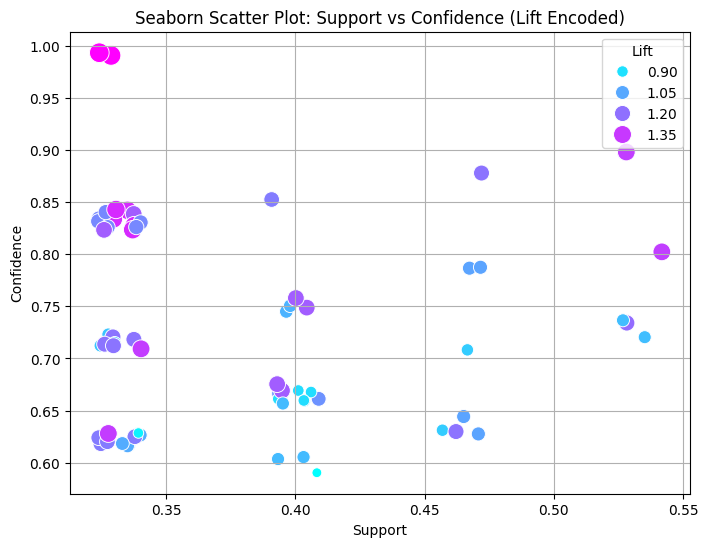

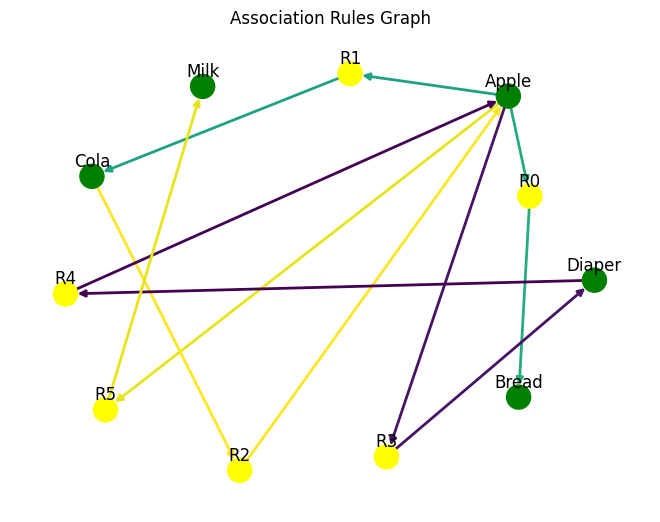

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import seaborn as sns

# Given dataset (15 transactions with 10 items)
dataset = [
    ['Bread', 'Milk', 'Beer', 'Eggs', 'Banana'],
    ['Bread', 'Diaper', 'Beer', 'Cola', 'Eggs', 'Apple'],
    ['Bread', 'Milk', 'Diaper', 'Cola', 'Chicken', 'Apple', 'Juice'],
    ['Milk', 'Diaper', 'Beer', 'Chicken', 'Eggs', 'Juice'],
    ['Bread', 'Milk', 'Diaper', 'Cola', 'Apple', 'Banana'],
    ['Bread', 'Milk', 'Diaper', 'Chicken', 'Eggs', 'Apple'],
    ['Bread', 'Diaper', 'Beer', 'Cola', 'Chicken', 'Juice'],
    ['Milk', 'Beer', 'Chicken', 'Eggs', 'Apple'],
    ['Bread', 'Diaper', 'Cola', 'Eggs', 'Juice'],
    ['Bread', 'Milk', 'Cola', 'Chicken', 'Apple', 'Juice'],
    ['Diaper', 'Cola', 'Eggs', 'Apple', 'Juice', 'Banana'],
    ['Bread', 'Milk', 'Diaper', 'Chicken', 'Eggs', 'Juice'],
    ['Bread', 'Diaper', 'Beer', 'Cola', 'Apple', 'Juice'],
    ['Milk', 'Diaper', 'Beer', 'Chicken', 'Apple', 'Banana'],
    ['Bread', 'Milk', 'Cola', 'Chicken', 'Eggs', 'Banana']
]

# Convert dataset to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
print("One-hot Encoded Dataset:\n", df.head())

# Task 1: Mine frequent itemsets with min_support=0.3
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
print("\nFrequent Itemsets (min_support=0.3):\n", frequent_itemsets)

# Task 2: Generate association rules with min_confidence=0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("\nAssociation Rules (min_confidence=0.6):\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Task 3: Interpretation of rules
print("\nInterpretation of Rules:")
if not rules.empty:  # Check if there are any rules
    sample_rule = rules.iloc[0]  # Example: First rule
    print(f"Rule: {list(sample_rule['antecedents'])} → {list(sample_rule['consequents'])}")
    print(f"Support: {sample_rule['support']:.2f} (occurs in {sample_rule['support']*100:.0f}% of transactions)")
    print(f"Confidence: {sample_rule['confidence']:.2f} (when antecedent is bought, consequent is bought {sample_rule['confidence']*100:.0f}% of the time)")
    print(f"Lift: {sample_rule['lift']:.2f} (rule is {sample_rule['lift']:.1f}x more likely than random chance)")
else:
    print("No rules generated.")

#Seaborn Scatter Plot for Apriori Rules
if not rules.empty:
    scatter_df = rules[['support', 'confidence', 'lift']].copy()

    # Add jitter
    scatter_df['support'] += np.random.uniform(-0.01, 0.01, len(scatter_df))
    scatter_df['confidence'] += np.random.uniform(-0.01, 0.01, len(scatter_df))

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=scatter_df,
        x='support',
        y='confidence',
        hue='lift',
        size='lift',
        palette='cool',
        sizes=(50, 200),
        legend='brief'
    )
    plt.title('Seaborn Scatter Plot: Support vs Confidence (Lift Encoded)')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.grid(True)
    plt.legend(title='Lift')
    plt.show()

# Network Graph Visualization
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = [f'R{i}' for i in range(rules_to_show)]

    for i in range(rules_to_show):
        G1.add_nodes_from([f"R{i}"])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, f"R{i}", color=colors[i], weight=2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge(f"R{i}", c, color=colors[i], weight=2)

    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.title('Association Rules Graph')
    plt.show()

# Draw the graph for the first 6 rules
if not rules.empty:
    draw_graph(rules, min(len(rules), 6))


**FP-GROWTH TREE**

One-hot Encoded Dataset:
    Apple  Banana   Beer  Bread  Chicken   Cola  Diaper   Eggs  Juice   Milk
0  False    True   True   True    False  False   False   True  False   True
1   True   False   True   True    False   True    True   True  False  False
2   True   False  False   True     True   True    True  False   True   True
3  False   False   True  False     True  False    True   True   True   True
4   True    True  False   True    False   True    True  False  False   True

FP-growth Frequent Itemsets (min_support=0.3):
      support                 itemsets
0   0.733333                  (Bread)
1   0.666667                   (Milk)
2   0.600000                   (Eggs)
3   0.466667                   (Beer)
4   0.333333                 (Banana)
5   0.733333                 (Diaper)
6   0.600000                   (Cola)
7   0.600000                  (Apple)
8   0.600000                (Chicken)
9   0.533333                  (Juice)
10  0.466667            (Bread, Milk)
11  0.400000 

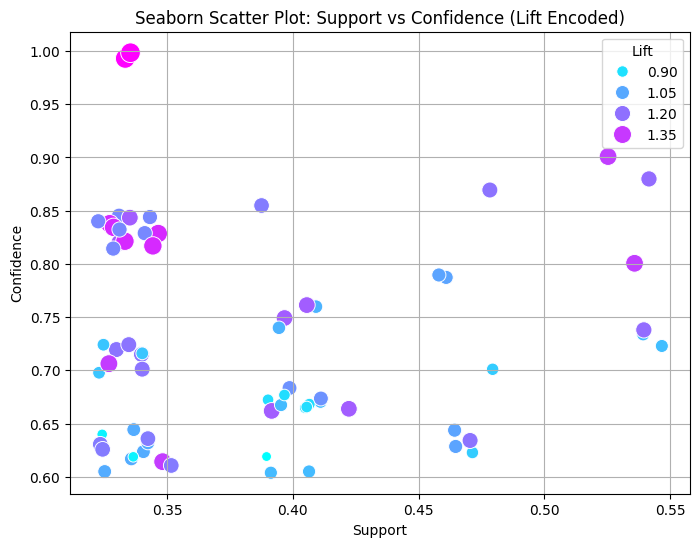

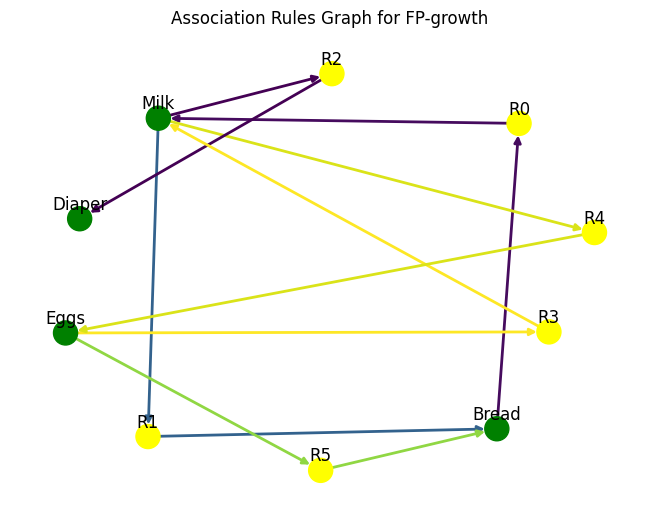

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules, apriori
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import seaborn as sns


# Given dataset (15 transactions with 10 items)
dataset = [
    ['Bread', 'Milk', 'Beer', 'Eggs', 'Banana'],
    ['Bread', 'Diaper', 'Beer', 'Cola', 'Eggs', 'Apple'],
    ['Bread', 'Milk', 'Diaper', 'Cola', 'Chicken', 'Apple', 'Juice'],
    ['Milk', 'Diaper', 'Beer', 'Chicken', 'Eggs', 'Juice'],
    ['Bread', 'Milk', 'Diaper', 'Cola', 'Apple', 'Banana'],
    ['Bread', 'Milk', 'Diaper', 'Chicken', 'Eggs', 'Apple'],
    ['Bread', 'Diaper', 'Beer', 'Cola', 'Chicken', 'Juice'],
    ['Milk', 'Beer', 'Chicken', 'Eggs', 'Apple'],
    ['Bread', 'Diaper', 'Cola', 'Eggs', 'Juice'],
    ['Bread', 'Milk', 'Cola', 'Chicken', 'Apple', 'Juice'],
    ['Diaper', 'Cola', 'Eggs', 'Apple', 'Juice', 'Banana'],
    ['Bread', 'Milk', 'Diaper', 'Chicken', 'Eggs', 'Juice'],
    ['Bread', 'Diaper', 'Beer', 'Cola', 'Apple', 'Juice'],
    ['Milk', 'Diaper', 'Beer', 'Chicken', 'Apple', 'Banana'],
    ['Bread', 'Milk', 'Cola', 'Chicken', 'Eggs', 'Banana']
]

# Convert dataset to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
print("One-hot Encoded Dataset:\n", df.head())

# Task 4: Mine frequent itemsets using FP-growth (min_support=0.3)
frequent_itemsets_fp = fpgrowth(df, min_support=0.3, use_colnames=True)
print("\nFP-growth Frequent Itemsets (min_support=0.3):\n", frequent_itemsets_fp)

# Task 5: Generate association rules (min_confidence=0.6)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.6)
print("\nFP-growth Association Rules (min_confidence=0.6):\n",
      rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Task 6: Comparison with Apriori (from Part 1)
# Re-run Apriori for comparison (same parameters)
frequent_itemsets_apriori = apriori(df, min_support=0.3, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.6)

print("\nComparison Summary:")
print("-" * 50)
print(f"Apriori: {len(frequent_itemsets_apriori)} frequent itemsets, {len(rules_apriori)} rules")
print(f"FP-growth: {len(frequent_itemsets_fp)} frequent itemsets, {len(rules_fp)} rules")
print("\nKey Observations:")
print("1. FP-growth is typically faster for large datasets (though speed difference may not be visible here).")
print("2. Both algorithms should produce identical results for the same min_support/min_confidence.")
print("3. FP-growth uses a compressed tree structure (FP-tree), while Apriori uses candidate generation.")

# Graph Visualization
support = rules_fp['support'].to_numpy()
confidence = rules_fp['confidence'].to_numpy()

for i in range(len(support)):
        support[i] += 0.0025 * (random.randint(1, 10) - 5)
        confidence[i] += 0.0025 * (random.randint(1, 10) - 5)

# Scatter plot for support vs confidence
#plt.scatter(support, confidence, alpha=0.5, marker="*")
# Prepare a DataFrame for plotting
scatter_df = rules_fp[['support', 'confidence', 'lift']].copy()

# Add small jitter to avoid overlap
scatter_df['support'] += np.random.uniform(-0.01, 0.01, len(scatter_df))
scatter_df['confidence'] += np.random.uniform(-0.01, 0.01, len(scatter_df))

# Seaborn scatter plot with lift as hue and size
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=scatter_df,
    x='support',
    y='confidence',
    hue='lift',
    size='lift',
    palette='cool',
    sizes=(50, 200),
    legend='brief'
)
plt.title('Seaborn Scatter Plot: Support vs Confidence (Lift Encoded)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.legend(title='Lift')
plt.show()

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = [f'R{i}' for i in range(rules_to_show)]

    for i in range(rules_to_show):
        G1.add_nodes_from([f"R{i}"])

        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, f"R{i}", color=colors[i], weight=2)

        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge(f"R{i}", c, color=colors[i], weight=2)

    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.title('Association Rules Graph for FP-growth')
    plt.show()

# Draw the graph for the first 6 rules
draw_graph(rules_fp, min(len(rules_fp), 6))